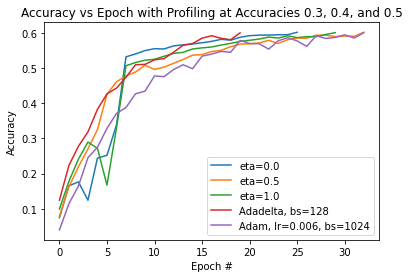

In [68]:
# 'The optimal parameters are' --> finish profiling
# start of profiling: 'surpasses threshold'

import matplotlib.pyplot as plt
# get accuracy
valNext = False
ACC = "Accuracy: "

files = ["eta00final/master.log", "eta05final/master.log", "eta10final/master.log"]
# files = ["eta00opt/master.txt", "eta05opt/master.txt"]

for fileName in files:
    accuracies = []
    with open(fileName) as f:
        while line := f.readline():
            if valNext:
                if "Validation Epoch:" in line:
                    accuracies.append(float(line[line.index(ACC) + len(ACC):]))
                valNext = False
            if "Training Epoch: " in line:
                valNext = True
    label = fileName[:len('eta')] + '=' + fileName[len('eta')] + '.' + fileName[len('eta') + 1]
    plt.plot(accuracies, label=label)

# Adding other training data now
ACC = "Accuracy: "
TIME = ": time="
ENERGY = ", energy="
THRESHOLD = 0.6

files_e2e = ['adadelta_bs128.txt', 'lr_0.006_adam_bs1024.txt']
recorded = set()
energy_time_128 = []
energy_consumption = {}
for file in files_e2e:
    acc = []
    time = []
    energy_cons = []
    with open(file) as f:
        line = f.readline()
        accuracy = 0
        while line:
            if "Validation Epoch:" in line:
                accuracy = float(line[line.index(ACC) + len(ACC): line.index("\n")])
                acc.append(accuracy)
                if accuracy >= THRESHOLD and file not in recorded:
                    energy_time_128.append((energy, time, file))
                    break
            elif "Up to epoch" in line:
                if "epoch 0" not in line:
                    t = float(line[line.index(TIME) + len(TIME): line.index(ENERGY)])
                    energy = float(line[line.index(", energy=") + len(", energy="): line.index(", cost=")])
                    time.append(t)
                    energy_cons.append(energy)
            line = f.readline()
        lr = 'Adam, lr=' + file.split('_')[1] + ', bs=1024' if 'adam' in file else 'Adadelta, bs=128'
        plt.plot(acc, label=lr)


plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch with Profiling at Accuracies 0.3, 0.4, and 0.5")
plt.show()


# TODO: add adadelta baseline and best adam?
# TODO: clean up labels in legend

bs128.txt
0.006


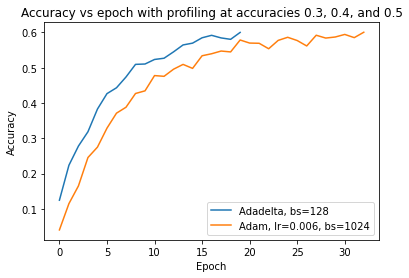

In [64]:
# Adding other training data now
ACC = "Accuracy: "
TIME = ": time="
ENERGY = ", energy="
THRESHOLD = 0.6

files_e2e = ['adadelta_bs128.txt', 'lr_0.006_adam_bs1024.txt']
recorded = set()
energy_time_128 = []
energy_consumption = {}
for file in files_e2e:
    acc = []
    time = []
    energy_cons = []
    with open(file) as f:
        line = f.readline()
        accuracy = 0
        while line:
            if "Validation Epoch:" in line:
                accuracy = float(line[line.index(ACC) + len(ACC): line.index("\n")])
                acc.append(accuracy)
                if accuracy >= THRESHOLD and file not in recorded:
                    energy_time_128.append((energy, time, file))
                    break
            elif "Up to epoch" in line:
                if "epoch 0" not in line:
                    t = float(line[line.index(TIME) + len(TIME): line.index(ENERGY)])
                    energy = float(line[line.index(", energy=") + len(", energy="): line.index(", cost=")])
                    time.append(t)
                    energy_cons.append(energy)
            line = f.readline()
        lr = 'Adam, lr=' + file.split('_')[1] + ', bs=1024' if 'adam' in file else 'Adadelta, bs=128'
        plt.plot(acc, label=lr)


plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epoch with profiling at accuracies 0.3, 0.4, and 0.5")
plt.show()

In [6]:
import pandas as pd
from eta00final.profiler_info import info as info00
from eta05final.profiler_info import info as info05
from eta10final.profiler_info import info as info10

names = ["$\eta$ = 0.0", "$\eta$ = 0.5", "$\eta$ = 1.0"]
for i, info in enumerate([info00, info05, info10]):
    df = pd.DataFrame(info)
    print(names[i])
    print(df)
    print(df.to_latex(header=["Acc", "Time (s)", "BS", "LR", "DR", "PL"], index=False))

$\eta$ = 0.0
   threshold   total_time  opt_bs  opt_lr  opt_dr  opt_pl
0        0.0  2158.877331     128   0.010    0.00     175
1        0.3  2196.340877     128   0.001    0.25     175
2        0.4  2225.124374     128   0.001    0.50     150
3        0.5  2245.739279     128   0.001    0.25     150
\begin{tabular}{rrrrrr}
\toprule
Acc &    Time (s) &  BS &    LR &   DR &  PL \\
\midrule
0.0 & 2158.877331 & 128 & 0.010 & 0.00 & 175 \\
0.3 & 2196.340877 & 128 & 0.001 & 0.25 & 175 \\
0.4 & 2225.124374 & 128 & 0.001 & 0.50 & 150 \\
0.5 & 2245.739279 & 128 & 0.001 & 0.25 & 150 \\
\bottomrule
\end{tabular}

$\eta$ = 0.5
   threshold   total_time  opt_bs  opt_lr  opt_dr  opt_pl
0        0.0  1756.542957     256   0.010    0.25     150
1        0.3  1769.804109     128   0.001    0.50     175
2        0.4  1784.178996     128   0.001    0.00     175
3        0.5  1794.504411     128   0.001    0.50     175
\begin{tabular}{rrrrrr}
\toprule
Acc &    Time (s) &  BS &    LR &   DR &  PL \\
\mid

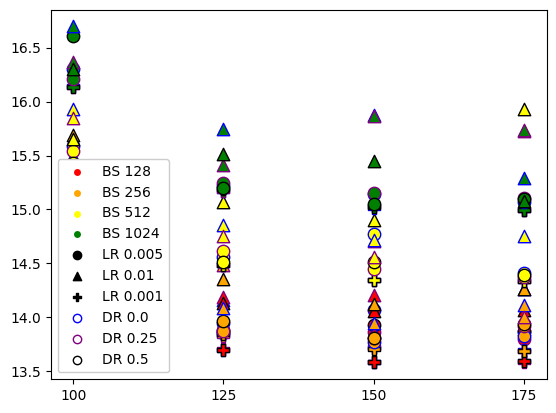

In [104]:
from eta00.threshold04history_all import data
import numpy as np
import math

df = pd.DataFrame(data)
df128 = df[df['bs'] == 128]
f = plt.figure()

bss = list(set(df.bs))
lrs = list(set(df.lr))
drs = list(set(df.dr))
markers = ['o', '^', 'P']
colors = ["red", "orange", "yellow", "green"]
edgecolors = ["blue", "purple", "black", "grey"]

for _, row in df.iterrows():
    plt.scatter(row.pl//1000, math.log(row.total_cost), c=colors[bss.index(row.bs)], marker=markers[lrs.index(row.lr)], edgecolors=edgecolors[drs.index(row.dr)], s=80)

f = lambda m,c,e: plt.scatter([],[],marker=m, color=c, edgecolors=e)

plt.xticks(range(100, 176, 25), ["100", "125", "150", "175"])
# plt.ylim(13.5, 13.7)
handles = [f("o", colors[i], "white") for i in range(len(colors))]
handles += [f(markers[i], "black", "black") for i in range(len(markers))]
handles += [f("o", "white", edgecolors[i]) for i in range(len(edgecolors))]

plt.legend(handles, [f"BS {bs}" for bs in bss] + [f"LR {lr}" for lr in lrs] + [f"DR {dr}" for dr in drs], loc=3, framealpha=1)
# for _, row in df128.iterrows():
#     labels.append(f"pl{row.pl//1000}+lr{row.lr}+dr{row.dr}")
# ax.set_xticks(range(36), labels=labels, rotation="vertical")

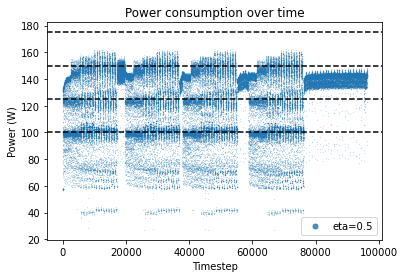

In [31]:
import pandas as pd
# df = pd.read_csv('eta00/zeus_logs+gpu0.power.csv')
# df2 = pd.read_csv('eta05/zeus_logs+gpu0.power.csv')
df = pd.read_csv('eta05final/zeus_logs+gpu0.power.csv')



In [32]:
df.head()

,Timestamp,Power
0,2022-12-10 04:54:34.009141389,57469
1,2022-12-10 04:54:34.110947842,57391
2,2022-12-10 04:54:34.213440947,57313
3,2022-12-10 04:54:34.315915762,57391
4,2022-12-10 04:54:34.417841096,58416


In [44]:
from datetime import datetime

def convert_to_datetime(row, time_length=time_length):
    return datetime.strptime(row[0][:time_length - 3], '%Y-%m-%d %H:%M:%S.%f')

time_length = len(df['Timestamp'].iloc(0)[0])
start_time = datetime.strptime(df['Timestamp'].iloc(0)[0][:time_length - 3], '%Y-%m-%d %H:%M:%S.%f')
# Convert to datetime
df['datetime'] =  df.apply(convert_to_datetime, axis=1)
# Subtract from `start_time` to get seconds
df['Time'] = df.apply(lambda row : (row['datetime'] - start_time).total_seconds(), axis=1)

In [45]:
df.head()

,Timestamp,Power,datetime,Time
0,2022-12-10 04:54:34.009141389,57469,2022-12-10 04:54:34.009141,0.000000
1,2022-12-10 04:54:34.110947842,57391,2022-12-10 04:54:34.110947,0.101806
2,2022-12-10 04:54:34.213440947,57313,2022-12-10 04:54:34.213440,0.204299
3,2022-12-10 04:54:34.315915762,57391,2022-12-10 04:54:34.315915,0.306774
4,2022-12-10 04:54:34.417841096,58416,2022-12-10 04:54:34.417841,0.408700


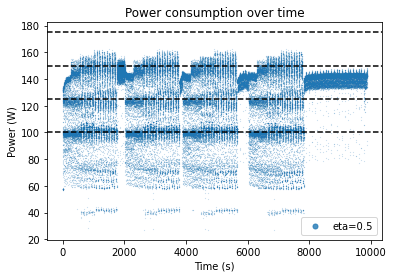

In [46]:
plt.scatter(df.Time, df.Power/1000, s=0.01, alpha=0.8, label="eta=0.5")
# plt.scatter(range(len(df2.Power)), df2.Power/1000, s=0.01, alpha=0.8, label="eta=0.5")
plt.axhline(y = 175, color = 'black', linestyle = '--')
plt.axhline(y = 150, color = 'black', linestyle = '--')
plt.axhline(y = 125, color = 'black', linestyle = '--')
plt.axhline(y = 100, color = 'black', linestyle = '--')
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
# legend = plt.legend(numpoints=1, fontsize=10)
# legend.legendHandles[0]._legmarker.set_markersize(6)
# legend.legendHandles[1]._legmarker.set_markersize(6)
plt.legend(markerscale=50)
plt.title("Power consumption over time")
plt.show()

In [39]:
df.head

,Timestamp,Power,datetime
0,2022-12-10 04:54:34.009141389,57469,2022-12-10 04:54:34.009141
1,2022-12-10 04:54:34.110947842,57391,2022-12-10 04:54:34.110947
2,2022-12-10 04:54:34.213440947,57313,2022-12-10 04:54:34.213440
3,2022-12-10 04:54:34.315915762,57391,2022-12-10 04:54:34.315915
4,2022-12-10 04:54:34.417841096,58416,2022-12-10 04:54:34.417841
